# K-Vector Model (Gabe Profile)

### Nexus-5x 전면 카메라

|resolution|fx|cx|fy|cy|k1|k2|p1|p2|k3|
|---|---|---|---|---|---|---|---|---|---|
|1920x1080|1433.4389|587.7184|1437.476|604.914|-0.4355|0.6174|-0.0008|-0.0049|-0.3697|
|1080x720|946.2767|612.9987|950.3305|326.0792|0.0438|-0.6156|-0.0125|-0.004|0.5669|

<br>


# imports

In [1]:
import sys
import cv2
import math
import glob
import matplotlib.pyplot as plt

sys.path.append("../../../../")
%matplotlib inline

%run ../../../../al/actor/face.py
%run ../../../../ac/visualizer/plotter.py
%run ../../../../ac/visualizer/trajectory.py
%run ../../../../al/optics/parameter.py
%run ../../../../al/actor/screen.py
%run ../../../../al/feature/face/candide.py
%run ../../../../ds/device/nexus5x.py

%run ../../../../ac/common/videos.py
%run ../../../../ac/math/angles.py
%run ../../../../ac/images/orientations.py
%run ../../../../ac/math/tolerance.py

Using TensorFlow backend.


# resource paths

In [2]:
candide_path="/home/chy/archive-model/candide/candide.npz"
land_mark_path="/home/chy/archive-model/candide/shape_predictor_68_face_landmarks.dat"
model_path = "/home/chy/archive-model/incubator/ove/exp-home2-model.json"
weight_path = "/home/chy/archive-model/incubator/ove/exp-home2-24e-weights.hdf5"
sample_path = "/home/chy/dev-bench/auto-catch/notes/dataset/profiles/gabe/"

In [3]:
# video to frames
# video_path = "{}/1280-720.mp4".format(sample_path)
# save_path = "{}/frames-2/".format(sample_path)
# video_to_frames(video_path, save_path)

In [4]:
# frame_path = "{}/frames-2/".format(sample_path)
# apply_rotate_to_images(frame_path, 90)

# prepare data

In [10]:
def load_img(idx):
    img_path = "{}/frames/{}.jpg".format(sample_path, idx)
    return cv2.imread(img_path)

imgs = []
for idx in range(11):
    img = load_img(idx)
    imgs.append(img)

# Face Module

In [7]:
candide = Candide(candide_path, land_mark_path)

intrinsic_param = IntrinsicParameters(946.2767, 950.3305, 612.9987, 326.0792)
screen = Screen(720, 1080)
camera = Camera(2.6, intrinsic_param, screen)

opt_predictor = OpticalAxisPredictor()
opt_predictor.load_model(model_path, weight_path)
face_model = FaceModel(candide)
face = Face(camera, face_model, opt_predictor, reference_fissure_length=25)

# 검증

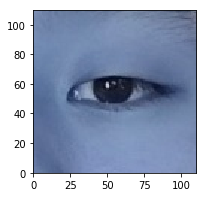

[0/r] ---------------------------------------------
pos (-63.64 68.94 238.97)
opt (0.08 0.06 -0.99)
opt YP (-4.715346171357479, 3.5891956800631775)


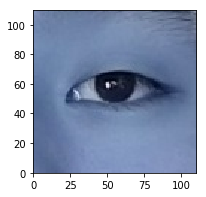

[1/r] ---------------------------------------------
pos (-61.87 70.01 238.97)
opt (0.09 0.02 -1.00)
opt YP (-4.939454069535706, 1.2715891243859676)


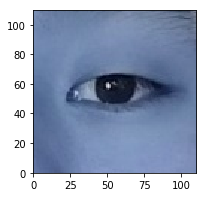

[2/r] ---------------------------------------------
pos (-64.15 71.20 242.81)
opt (0.13 0.11 -0.99)
opt YP (-7.725627823975069, 6.068287544513352)


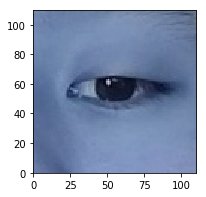

[3/r] ---------------------------------------------
pos (-64.05 71.63 243.40)
opt (0.22 0.05 -0.97)
opt YP (-12.511104243296122, 2.9220695460434642)


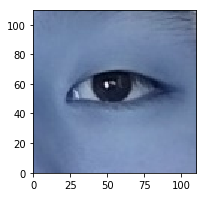

[4/r] ---------------------------------------------
pos (-63.30 67.97 238.65)
opt (0.08 0.04 -1.00)
opt YP (-4.542631604702189, 2.2074208767695063)


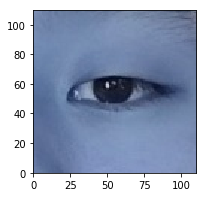

[5/r] ---------------------------------------------
pos (-63.64 68.94 238.97)
opt (0.08 0.06 -0.99)
opt YP (-4.715346171357479, 3.5891956800631775)


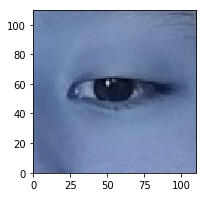

[6/r] ---------------------------------------------
pos (-63.96 69.45 239.22)
opt (0.06 0.11 -0.99)
opt YP (-3.3186160285458297, 6.10788129735827)


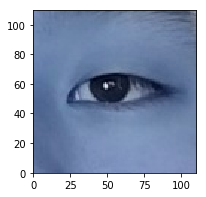

[7/r] ---------------------------------------------
pos (-66.20 69.47 247.11)
opt (0.02 0.02 -1.00)
opt YP (-0.9607318473330548, 1.0391036790256025)


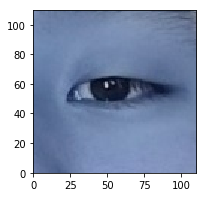

[8/r] ---------------------------------------------
pos (-66.20 68.45 242.81)
opt (0.02 0.07 -1.00)
opt YP (-1.0390010127446407, 3.9133287104284795)


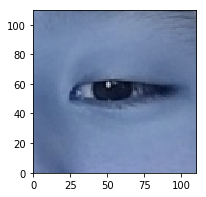

[9/r] ---------------------------------------------
pos (-69.70 70.64 252.23)
opt (-0.02 0.16 -0.99)
opt YP (1.2206496802777183, 9.202759538601523)


AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
lk_vec, rk_vec = Vector3D(0,0,0), Vector3D(0,0,0)
trajectory = ScreenTrajectory()

def shot(idx, side="r"):
    def select(face, side):
        eye_img = face.r_eye_img if side == "r" else face.l_eye_img
        refs = face.get_references()
        pos = refs["{}_pos".format(side)]
        opt = refs["{}_opt".format(side)]
        tar = refs["{}_tar".format(side)]
        tar = Vector2D.from_np_vec(tar)
        
        return eye_img, pos, opt, tar

    def report(face):
        tx, ty = get_true_cam_xy(idx)
        eye_img, pos, opt, tar = select(face, side)
        trajectory.mark(idx, tar.x(), tar.y())
        show_image(eye_img, extent=(0,110,0,110), fig_size=(3, 3))
        print("[{}/{}] ---------------------------------------------".format(idx, side))
        print("pos {}".format(pos))
        print("opt {}".format(opt))
        print("opt YP {}".format(opt.to_yaw_pitch()))
#         print("tar {} / truth ({}, {})".format(tar, tx, ty))

    face.match(imgs[idx])
    face.analysis()
    face.compute_gaze_target_pos_in_mm(lk_vec, rk_vec)
    report(face)
    
for i in range(11):
    shot(i)

KeyError: 10

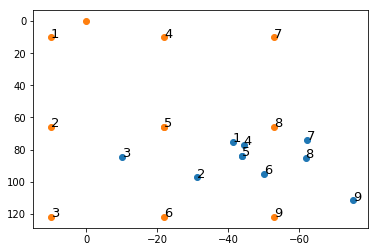

In [13]:
trajectory.plot_scatter()